# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.Draw the inferences from the clusters obtained.

Data Description:

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. 
For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df.drop(columns='ID#', inplace=True)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [4]:
df.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [5]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [6]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

# Hierarchical Clustering

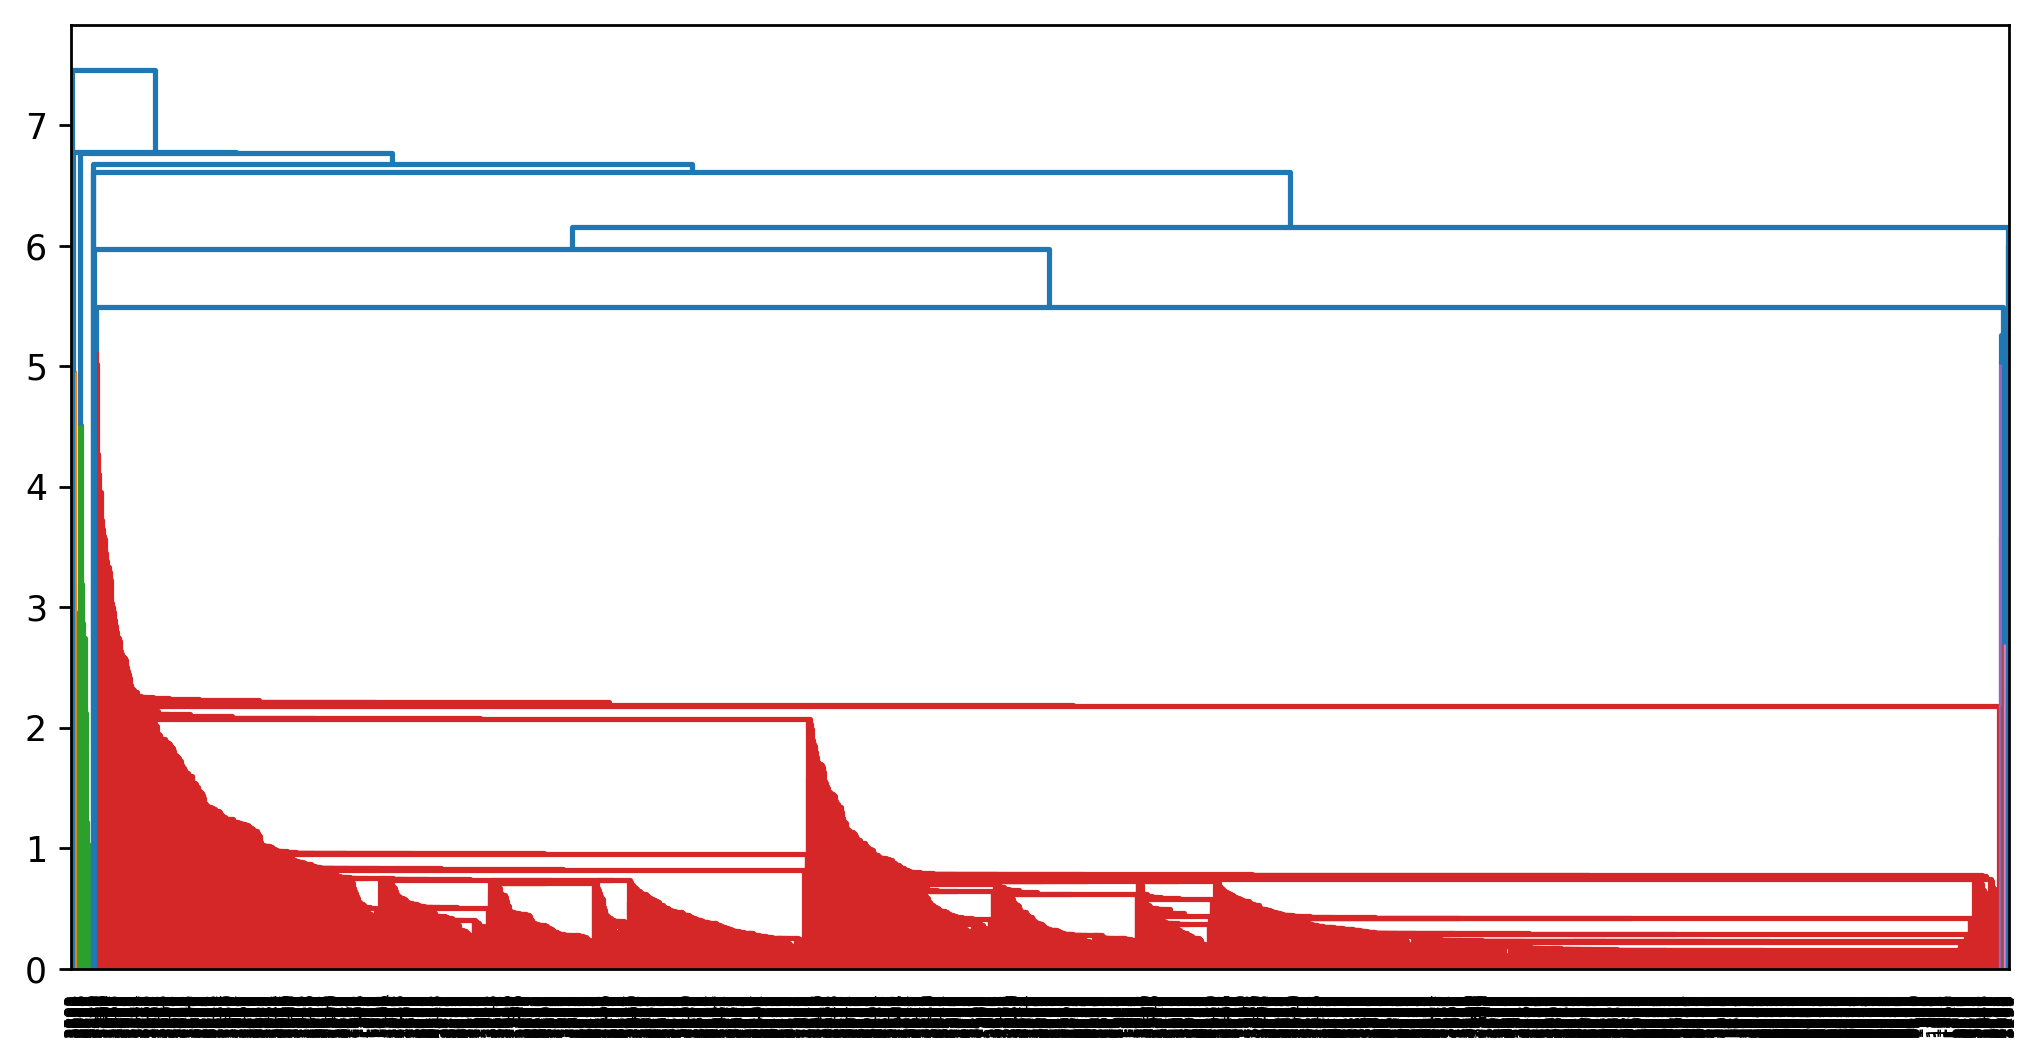

In [7]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(x)
dendo = hierarchy.dendrogram(lk)

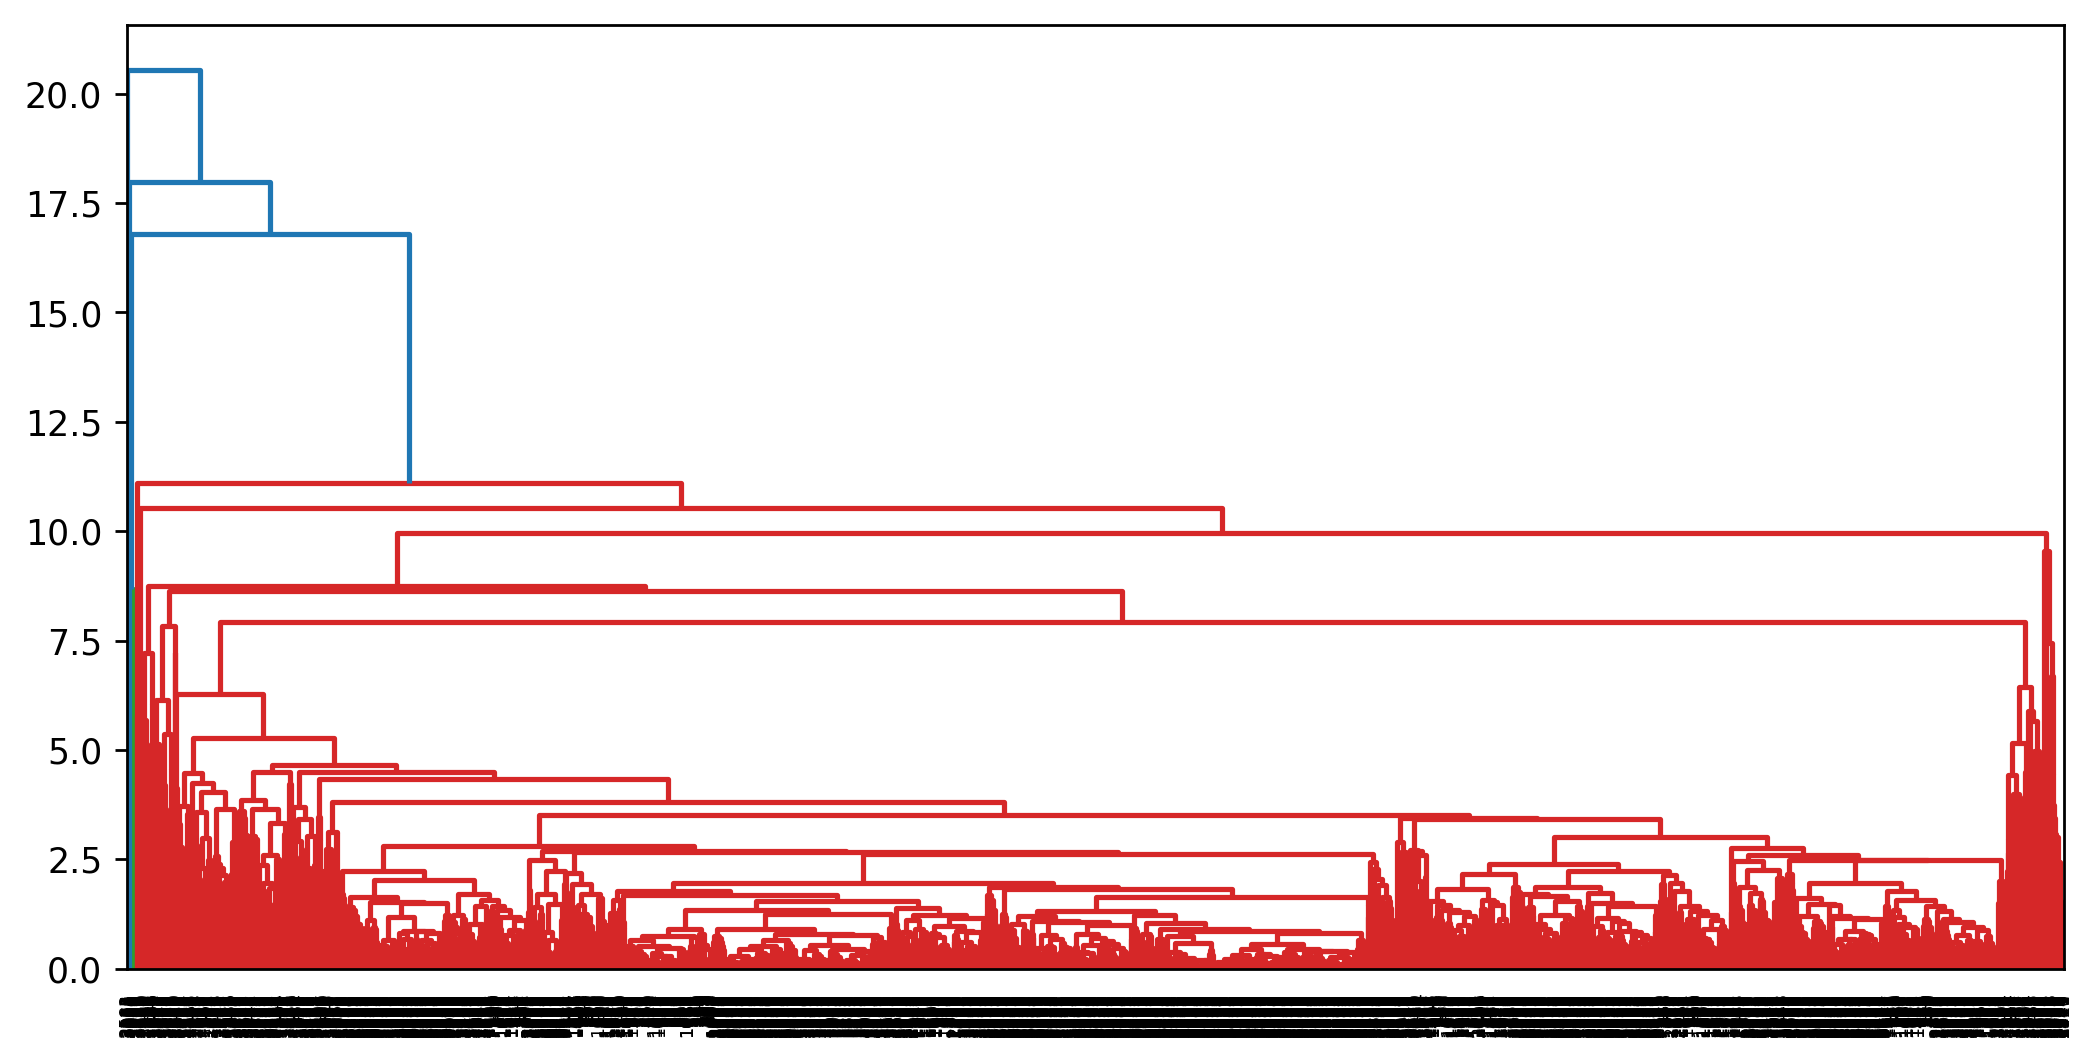

In [8]:
lk = hierarchy.linkage(x, method='average')
dendo = hierarchy.dendrogram(lk)

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
hc = AgglomerativeClustering(n_clusters= 11)
y = hc.fit_predict(x)
y

array([9, 9, 9, ..., 7, 6, 6], dtype=int64)

In [11]:
df['Clusters'] = y
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  Clusters  
0          0         9  
1          0         9  
2          0         9  
3          0         9  
4          1         7  
...      ...       ...  
3994       1         1  
3995       1         1  
3996       1         7  
3997       0         6  
3998       0         6  

[3999 rows x 12 columns]

In [13]:
df['Clusters'].value_counts()

6     1207
9      669
7      622
1      570
10     393
5      196
2      130
0      130
3       43
8       21
4       18
Name: Clusters, dtype: int64

In [14]:
df.groupby('Clusters').agg('mean')

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Clusters                                                                
0         134880.892308   393.323077   2.430769   1.000000   1.000000   
1          78819.310526    17.821053   1.078947   1.000000   1.000000   
2         110219.330769  3502.323077   1.861538   1.000000   1.000000   
3          68876.581395    23.255814   1.139535   2.348837   1.000000   
4         129951.388889    65.666667   3.388889   1.000000   3.722222   
5         174500.219388    20.142857   4.719388   1.000000   1.000000   
6          34564.370340     9.466446   1.277548   1.000000   1.000000   
7          63637.593248    38.881029   3.255627   1.000000   1.000000   
8         880404.190476   510.952381   3.333333   1.000000   1.000000   
9          39873.476831     0.747384   1.324365   1.000000   1.000000   
10        131229.491094    17.180662   3.829517   1.000000   1.000000   

           Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Clusters                                                                  
0         36582.169231    29.338462        5915.523077        16.638462   
1          5847.610526     6.956140         680.970175         2.070175   
2         17226.661538    11.092308         727.153846         2.269231   
3         14689.837209    17.534884         582.627907         2.209302   
4         86259.888889    26.222222         422.222222         1.333333   
5         75151.122449    22.142857         545.076531         1.780612   
6          4515.278376     6.002486          68.813587         0.242751   
7         27698.287781    17.643087         312.779743         0.906752   
8         62619.285714    19.333333        1316.333333         5.380952   
9          4670.140508     8.499253          81.047833         0.261584   
10        36138.391858    18.569975         226.725191         0.615776   

          Days_since_enroll    Award?  
Clusters                               
0               4599.607692  0.753846  
1               4520.301754  0.791228  
2               4161.053846  0.600000  
3               3968.930233  0.395349  
4               4488.777778  0.500000  
5               5544.984694  0.954082  
6               2353.636288  0.000000  
7               4345.491961  1.000000  
8               6705.619048  0.904762  
9               5683.690583  0.000000  
10              4909.516539  0.000000

In [15]:
df[df['Clusters'] == 3]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8      443003           0          3          2          1         1753   
198      8669           0          1          3          1        11397   
226    117329           0          1          2          1         6448   
381    167670           0          1          3          1        15907   
392     11189           0          1          2          1         9044   
561    380930           0          2          2          1        22485   
794     55610           0          1          2          1         5095   
940     44824           0          1          3          1        21107   
1149    84856           0          1          2          1         6894   
1270    16103           0          1          3          1        10819   
1383    18154           0          1          2          1         7748   
1389    49145           0          1          2          1        12755   
1527    23965           0          1          2          1         7308   
1541    36887           0          1          2          1         9048   
1791    32510           0          1          3          1        14568   
1918    52139           0          1          3          1        16314   
1976    11961           0          1          2          1        11961   
2006   101901           0          1          2          1        17898   
2047     4148           0          1          3          1        13504   
2166   100634           0          1          3          1        69669   
2278    30171           0          1          3          1        15370   
2317    10458           0          1          2          1        10458   
2421    41062           0          1          2          1         8275   
2557    42966           0          1          2          1         7734   
2674    59704           0          4          2          1        57404   
2741    42970           0          1          2          1         7889   
2906    17769           0          1          2          1         5165   
2967     8210           0          1          2          1         9122   
2978    22805           0          1          3          1        26334   
2999   142527        1000          1          3          1        24091   
3155    21736           0          1          2          1         6672   
3191    56624           0          1          2          1        12311   
3203    64924           0          1          3          1        14971   
3359    20318           0          1          2          1         6990   
3367    23197           0          1          3          1        10587   
3487    38292           0          1          2          1        12487   
3611    37300           0          1          3          1        23760   
3762    74531           0          1          2          1        10914   
3779    35850           0          1          3          1        17759   
3788   374613           0          1          2          1        23592   
3837     8150           0          1          2          1        14135   
3851    11947           0          1          2          1         8099   
3959    13942           0          1          2          1         5822   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
8              43               3850               12               6948   
198            16                  0                0               7486   
226            11                  0                0               7416   
381            13                  0                0               6994   
392            20                  0                0               8296   
561            25                213                1               6539   
794            13                  0                0               6151   
940            19               2000                4               5916   
1149           13    

# KMeans

In [16]:
df.drop(columns='Clusters', inplace=True)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [17]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [25]:
from sklearn.cluster import KMeans
km = KMeans()
y1 = km.fit_predict(x)

In [26]:
x1 = pd.DataFrame(x)
x1['Clusters'] = y1
x1

0         1         2         3         4         5         6  \
0    -0.451141 -0.186299 -0.769578 -0.098242 -0.062767 -0.702786 -1.104065   
1    -0.539457 -0.186299 -0.769578 -0.098242 -0.062767 -0.701088 -0.999926   
2    -0.320031 -0.186299 -0.769578 -0.098242 -0.062767 -0.539253 -0.791649   
3    -0.583799 -0.186299 -0.769578 -0.098242 -0.062767 -0.689286 -1.104065   
4     0.239678 -0.186299  1.409471 -0.098242 -0.062767  1.083121  1.499394   
...        ...       ...       ...       ...       ...       ...       ...   
3994 -0.547079 -0.186299 -0.769578 -0.098242 -0.062767 -0.356960 -0.791649   
3995 -0.091465 -0.186299 -0.769578 -0.098242 -0.062767 -0.669367 -0.687511   
3996 -0.000043 -0.186299  0.683121 -0.098242 -0.062767  0.343804 -0.375096   
3997 -0.185607 -0.186299 -0.769578 -0.098242 -0.062767 -0.689286 -1.104065   
3998 -0.700508 -0.186299 -0.769578 -0.098242 -0.062767 -0.709992 -1.208203   

             7         8         9        10  Clusters  
0    -0.328603 -0.362168  1.395454 -0.766919         5  
1    -0.328603 -0.362168  1.379957 -0.766919         5  
2    -0.328603 -0.362168  1.411920 -0.766919         5  
3    -0.328603 -0.362168  1.372208 -0.766919         5  
4     1.154932  0.692490  1.363975  1.303918         1  
...        ...       ...       ...       ...       ...  
3994 -0.185750 -0.098503 -1.315120  1.303918         0  
3995 -0.328603 -0.362168 -1.318994  1.303918         0  
3996 -0.328603 -0.362168 -1.315604  1.303918         0  
3997  0.028531 -0.098503 -1.316088 -0.766919         2  
3998 -0.328603 -0.362168 -1.317541 -0.766919         2  

[3999 rows x 12 columns]

In [27]:
z1 = km.cluster_centers_
z1

array([[-1.53151141e-01, -5.83664081e-02, -2.64720468e-01,
        -9.82418871e-02, -6.27665798e-02, -2.71672161e-01,
        -1.03564877e-01, -2.74580340e-02, -2.07060165e-02,
         6.58849698e-02,  1.30391816e+00],
       [ 6.42787817e-01, -1.06246662e-01,  1.55562670e+00,
        -9.82418871e-02, -5.02726250e-02,  1.36988578e+00,
         8.70373375e-01, -5.07964342e-02, -5.09150973e-02,
         4.06071862e-01,  5.38718464e-01],
       [-3.88423360e-01, -1.44309956e-01, -5.87990959e-01,
        -9.82418871e-02, -6.27665798e-02, -5.28169037e-01,
        -5.20836031e-01, -2.21904212e-01, -2.43926556e-01,
        -9.75972740e-01, -7.66919299e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01],
       [ 1.24463396e+00,  4.86198029e-01,  2.36594659e-01,
        -9.82418871e-02, -6.27665798e-02,  8.04931022e-01,
  

# Elbow Curve

In [28]:
# WCSS
inertia = []
for i in range(1,55):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    inertia.append(km.inertia_)
inertia

[43988.999999999985,
 35409.5166298613,
 30899.271221785566,
 27155.18698856954,
 24889.428256301322,
 21089.69478480692,
 19165.861458655658,
 17369.565506075094,
 16049.684338633006,
 14726.978974443173,
 13706.564553679998,
 12946.805804385735,
 12425.914396030506,
 11974.972758412094,
 11528.806247230947,
 11295.984492071238,
 10715.086929128398,
 10354.419739964447,
 10118.979639006302,
 9939.586523150549,
 9550.04346454222,
 9238.383459397515,
 8958.916360838064,
 8689.66281927859,
 8542.219288434262,
 8321.032235986917,
 8251.843357532956,
 8043.612421444843,
 7954.184593023339,
 7788.540498299448,
 7611.475704426751,
 7529.416705882917,
 7455.730382668715,
 7320.043905440922,
 7224.984905870101,
 7082.223051824045,
 6951.317690917966,
 6883.604234420978,
 6778.460603511637,
 6666.539749361192,
 6627.546889901831,
 6558.669685821021,
 6476.16760511215,
 6387.514615988615,
 6279.263002923806,
 6188.154118306312,
 6192.096988948095,
 6115.782353730301,
 6038.696562414673,
 5927.07

Text(0, 0.5, 'WCSS')

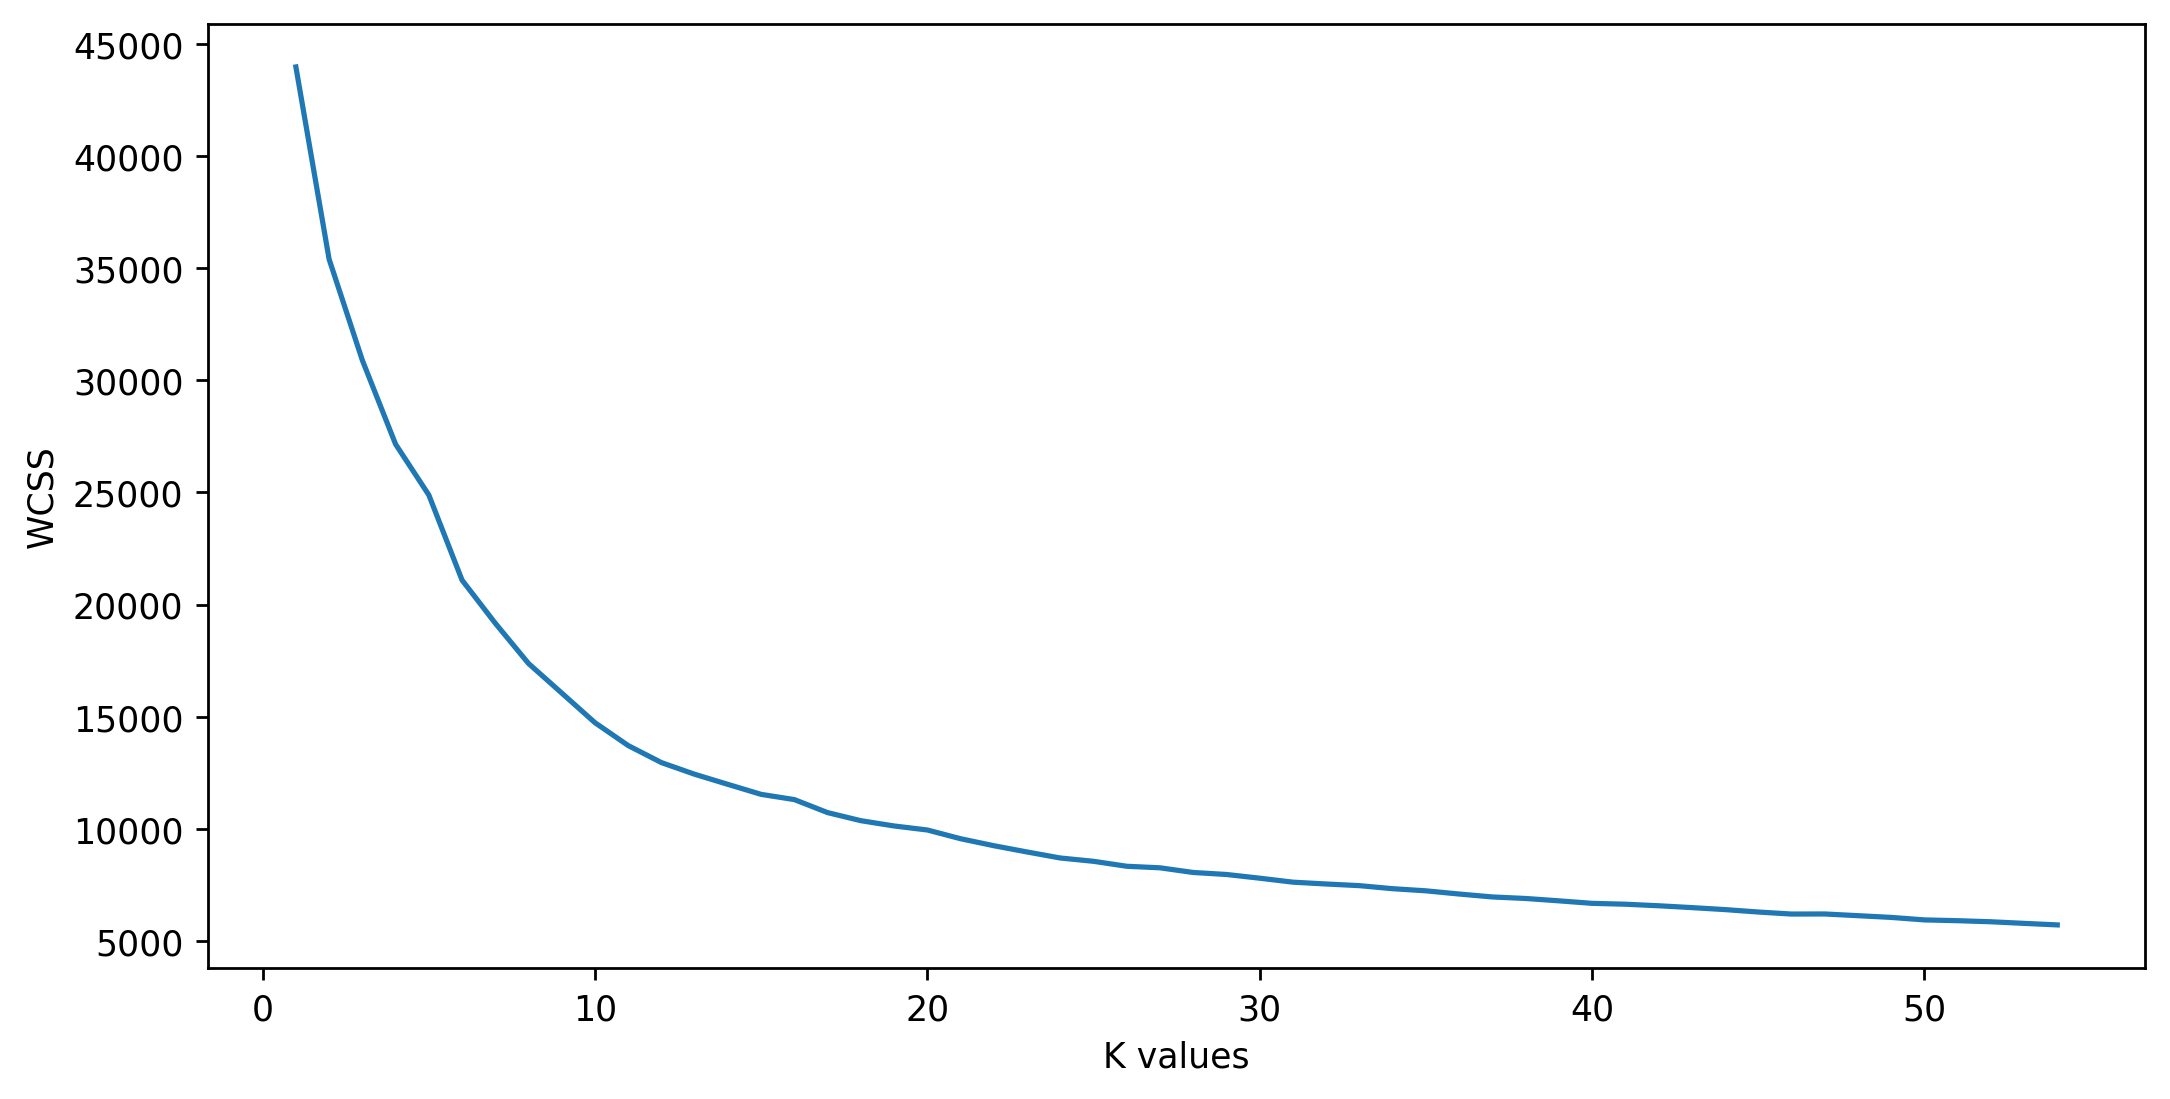

In [29]:
plt.plot(range(1,55), inertia)
plt.xlabel('K values')
plt.ylabel('WCSS')

In [41]:
km = KMeans(n_clusters=11)
y2 = km.fit_predict(x)
y2

array([10, 10, 10, ...,  7,  4,  4])

In [42]:
x2 = pd.DataFrame(x)
x2['Clusters'] = y2
x2

0         1         2         3         4         5         6  \
0    -0.451141 -0.186299 -0.769578 -0.098242 -0.062767 -0.702786 -1.104065   
1    -0.539457 -0.186299 -0.769578 -0.098242 -0.062767 -0.701088 -0.999926   
2    -0.320031 -0.186299 -0.769578 -0.098242 -0.062767 -0.539253 -0.791649   
3    -0.583799 -0.186299 -0.769578 -0.098242 -0.062767 -0.689286 -1.104065   
4     0.239678 -0.186299  1.409471 -0.098242 -0.062767  1.083121  1.499394   
...        ...       ...       ...       ...       ...       ...       ...   
3994 -0.547079 -0.186299 -0.769578 -0.098242 -0.062767 -0.356960 -0.791649   
3995 -0.091465 -0.186299 -0.769578 -0.098242 -0.062767 -0.669367 -0.687511   
3996 -0.000043 -0.186299  0.683121 -0.098242 -0.062767  0.343804 -0.375096   
3997 -0.185607 -0.186299 -0.769578 -0.098242 -0.062767 -0.689286 -1.104065   
3998 -0.700508 -0.186299 -0.769578 -0.098242 -0.062767 -0.709992 -1.208203   

             7         8         9        10  Clusters  
0    -0.328603 -0.362168  1.395454 -0.766919        10  
1    -0.328603 -0.362168  1.379957 -0.766919        10  
2    -0.328603 -0.362168  1.411920 -0.766919        10  
3    -0.328603 -0.362168  1.372208 -0.766919        10  
4     1.154932  0.692490  1.363975  1.303918         1  
...        ...       ...       ...       ...       ...  
3994 -0.185750 -0.098503 -1.315120  1.303918         7  
3995 -0.328603 -0.362168 -1.318994  1.303918         7  
3996 -0.328603 -0.362168 -1.315604  1.303918         7  
3997  0.028531 -0.098503 -1.316088 -0.766919         4  
3998 -0.328603 -0.362168 -1.317541 -0.766919         4  

[3999 rows x 12 columns]

In [43]:
z2 = km.cluster_centers_
z2

array([[-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.20291238, -0.05847659,  1.56367617, -0.09824189, -0.05260285,
         1.39813397,  0.87725042, -0.07971618, -0.08071644,  0.45930541,
         1.26283011],
       [ 0.43216289,  7.2878929 , -0.05719688, -0.09824189, -0.06276658,
         0.05050676,  0.07149734,  0.3419436 ,  0.39333244, -0.07623932,
         0.26849943],
       [ 0.90442565,  0.68960154,  0.29049966, -0.09824189, -0.06276658,
         1.07398045,  2.79127304,  6.87710931,  6.58574903,  0.03522628,
         1.191981  ],
       [-0.42319434, -0.13738537, -0.69664876, -0.09824189, -0.06276658,
        -0.5878275 , -0.62403527, -0.25351236, -0.26804016, -1.03292218,
        -0.7669193 ],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.337

In [44]:
df['Y'] = y2
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?   Y  
0          0  10  
1          0  10  
2          0  10  
3          0  10  
4          1   1  
...      ...  ..  
3994       1   7  
3995       1   7  
3996       1   7  
3997       0   4  
3998       0   4  

[3999 rows x 12 columns]

In [47]:
df.groupby('Y').agg('mean')

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles   Bonus_miles  \
Y                                                                               
0    68876.581395    23.255814   1.139535   2.348837   1.000000  14689.837209   
1    94047.400794    98.878968   4.212302   1.000000   1.001984  50906.912698   
2   117147.384615  5781.788462   1.980769   1.000000   1.000000  18364.480769   
3   164734.027027   677.567568   2.459459   1.000000   1.000000  43079.270270   
4    30958.969574    37.837728   1.100406   1.000000   1.000000   2950.018256   
5   138061.400000    78.800000   3.466667   1.000000   4.066667  93927.866667   
6   561162.797101   227.855072   4.028986   1.000000   1.000000  76644.000000   
7    53702.190345    92.307586   1.666207   1.000000   1.000000   9760.515862   
8   108526.787980    14.727880   3.420701   1.000000   1.001669  28762.801336   
9   110607.746988   247.638554   1.825301   1.000000   1.000000  20278.493976   
10   47526.880448    35.729763   1.114570   1.000000   1.001245   3047.338730   

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
Y                                                                        
0     17.534884         582.627907         2.209302        3968.930233   
1     20.025794         348.450397         1.067460        5066.968254   
2     12.288462         938.788462         2.865385        3961.134615   
3     38.405405       10088.243243        26.351351        4191.297297   
4      5.609533         105.129817         0.356998        1985.702840   
5     28.066667         506.666667         1.600000        4613.866667   
6     23.550725        1418.536232         4.913043        6263.913043   
7      9.822069         268.401379         0.852414        4214.587586   
8     17.497496         157.948247         0.445743        4411.135225   
9     20.746988        3610.192771        10.614458        4263.463855   
10     6.059776         148.665006         0.465753        5628.572852   

      Award?  
Y             
0   0.395349  
1   0.980159  
2   0.500000  
3   0.945946  
4   0.000000  
5   0.533333  
6   0.840580  
7   1.000000  
8   0.000000  
9   0.710843  
10  0.000000

In [49]:
df[df['Y'] == 1]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4       97752           0          4          1          1        43300   
9      104860           0          3          1          1        28426   
11      96522           0          5          1          1        61105   
15      28495           0          4          1          1        49442   
16      51890           0          4          1          1        48963   
...       ...         ...        ...        ...        ...          ...   
3881    32424           0          4          1          1        39635   
3883   126167           0          5          1          1       190160   
3908    57642           0          4          1          1        52176   
3930    40424           0          4          1          1        44110   
3954    33972           0          3          1          1        21029   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
4              26               2077                4               6935   
9              28               1150                3               6931   
11             19                  0                0               6924   
15             15                  0                0               6912   
16             16                  0                0               6910   
...           ...                ...              ...                ...   
3881           16                  0                0               1584   
3883           15                  0                0               1612   
3908           15                  0                0               1564   
3930           26                343                3               1523   
3954           29                  0                0               1467   

      Award?  Y  
4          1  1  
9          1  1  
11         1  1  
15         1  1  
16         1  1  
...      ... ..  
3881       1  1  
3883       1  1  
3908       1  1  
3930       1  1  
3954       1  1  

[504 rows x 12 columns]

# DBSCAN

In [50]:
df.drop(columns='Y', inplace=True)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [51]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

<AxesSubplot:>

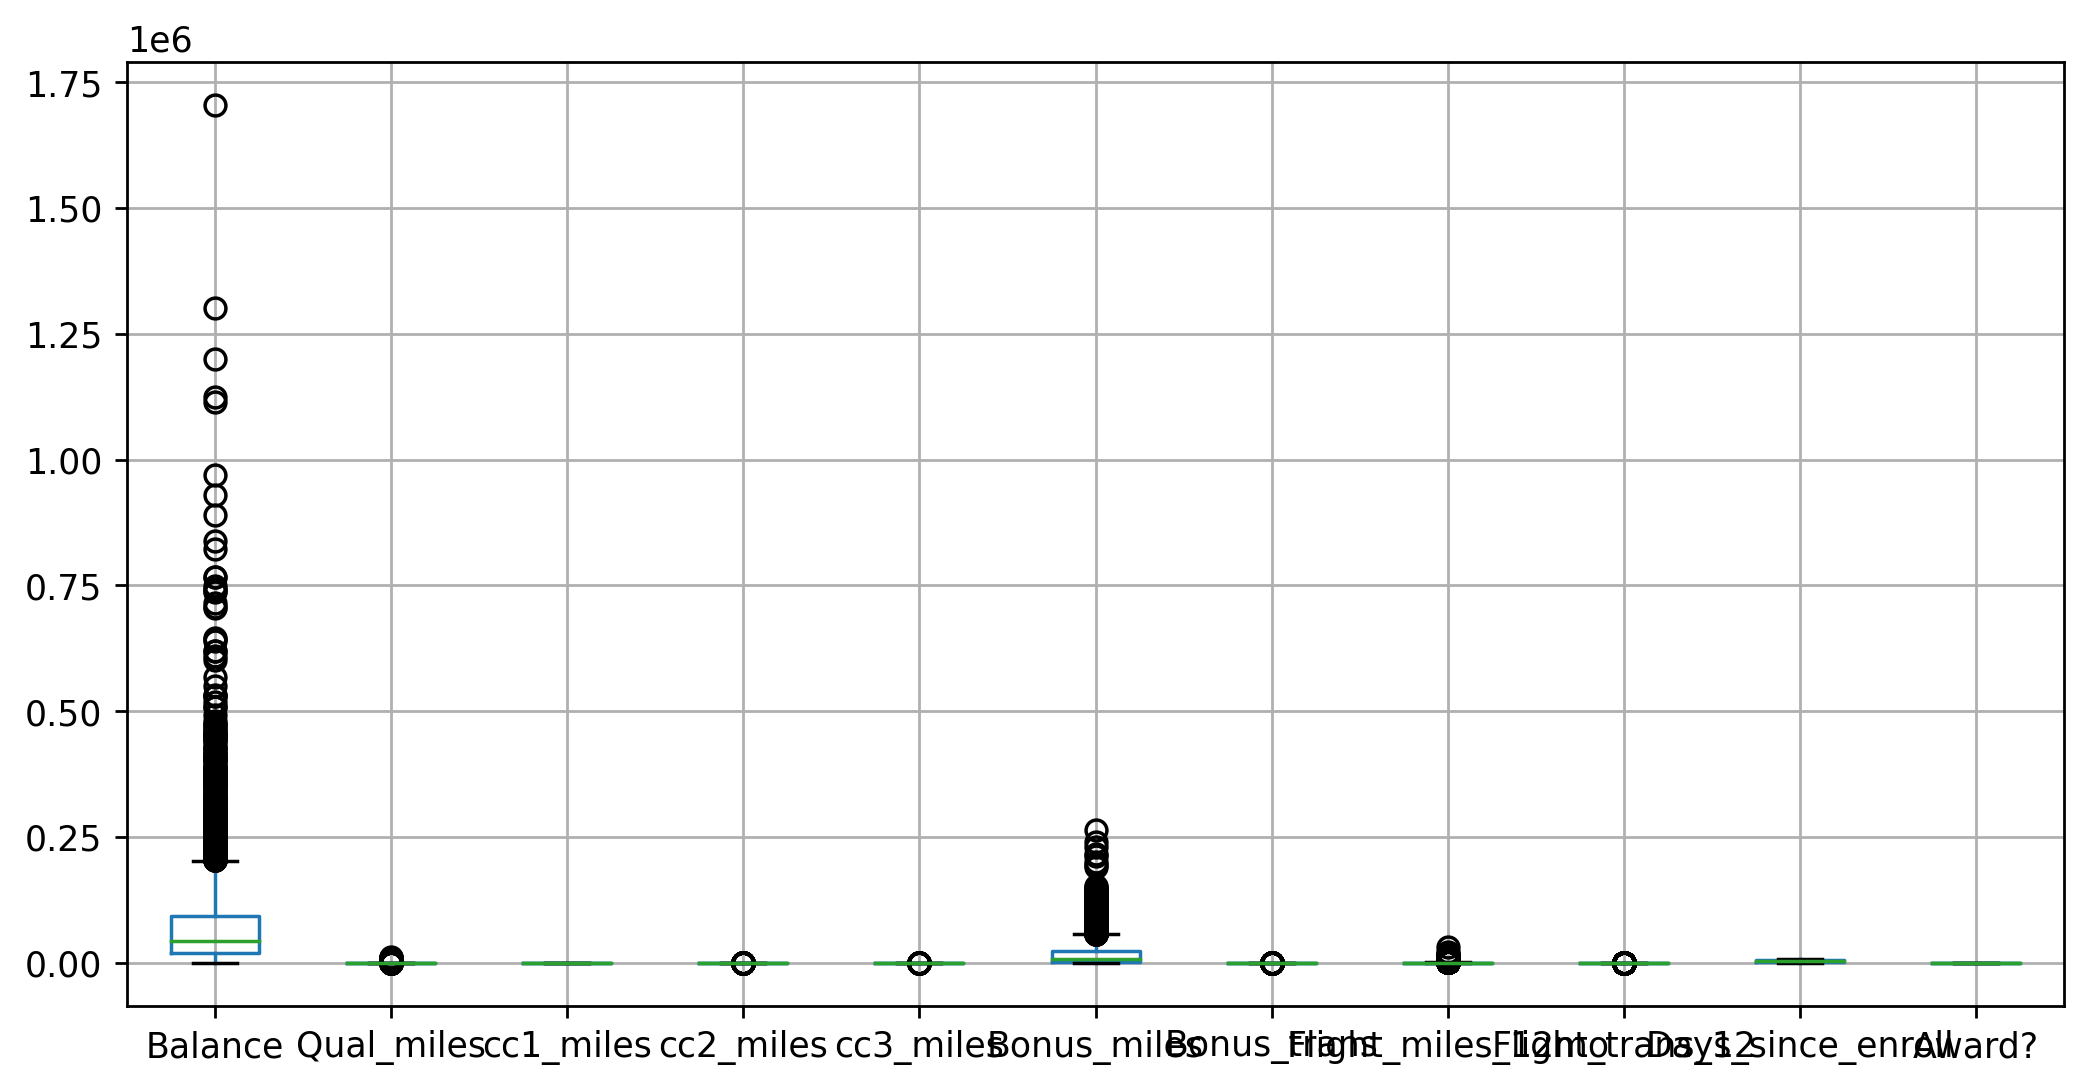

In [52]:
df.boxplot()

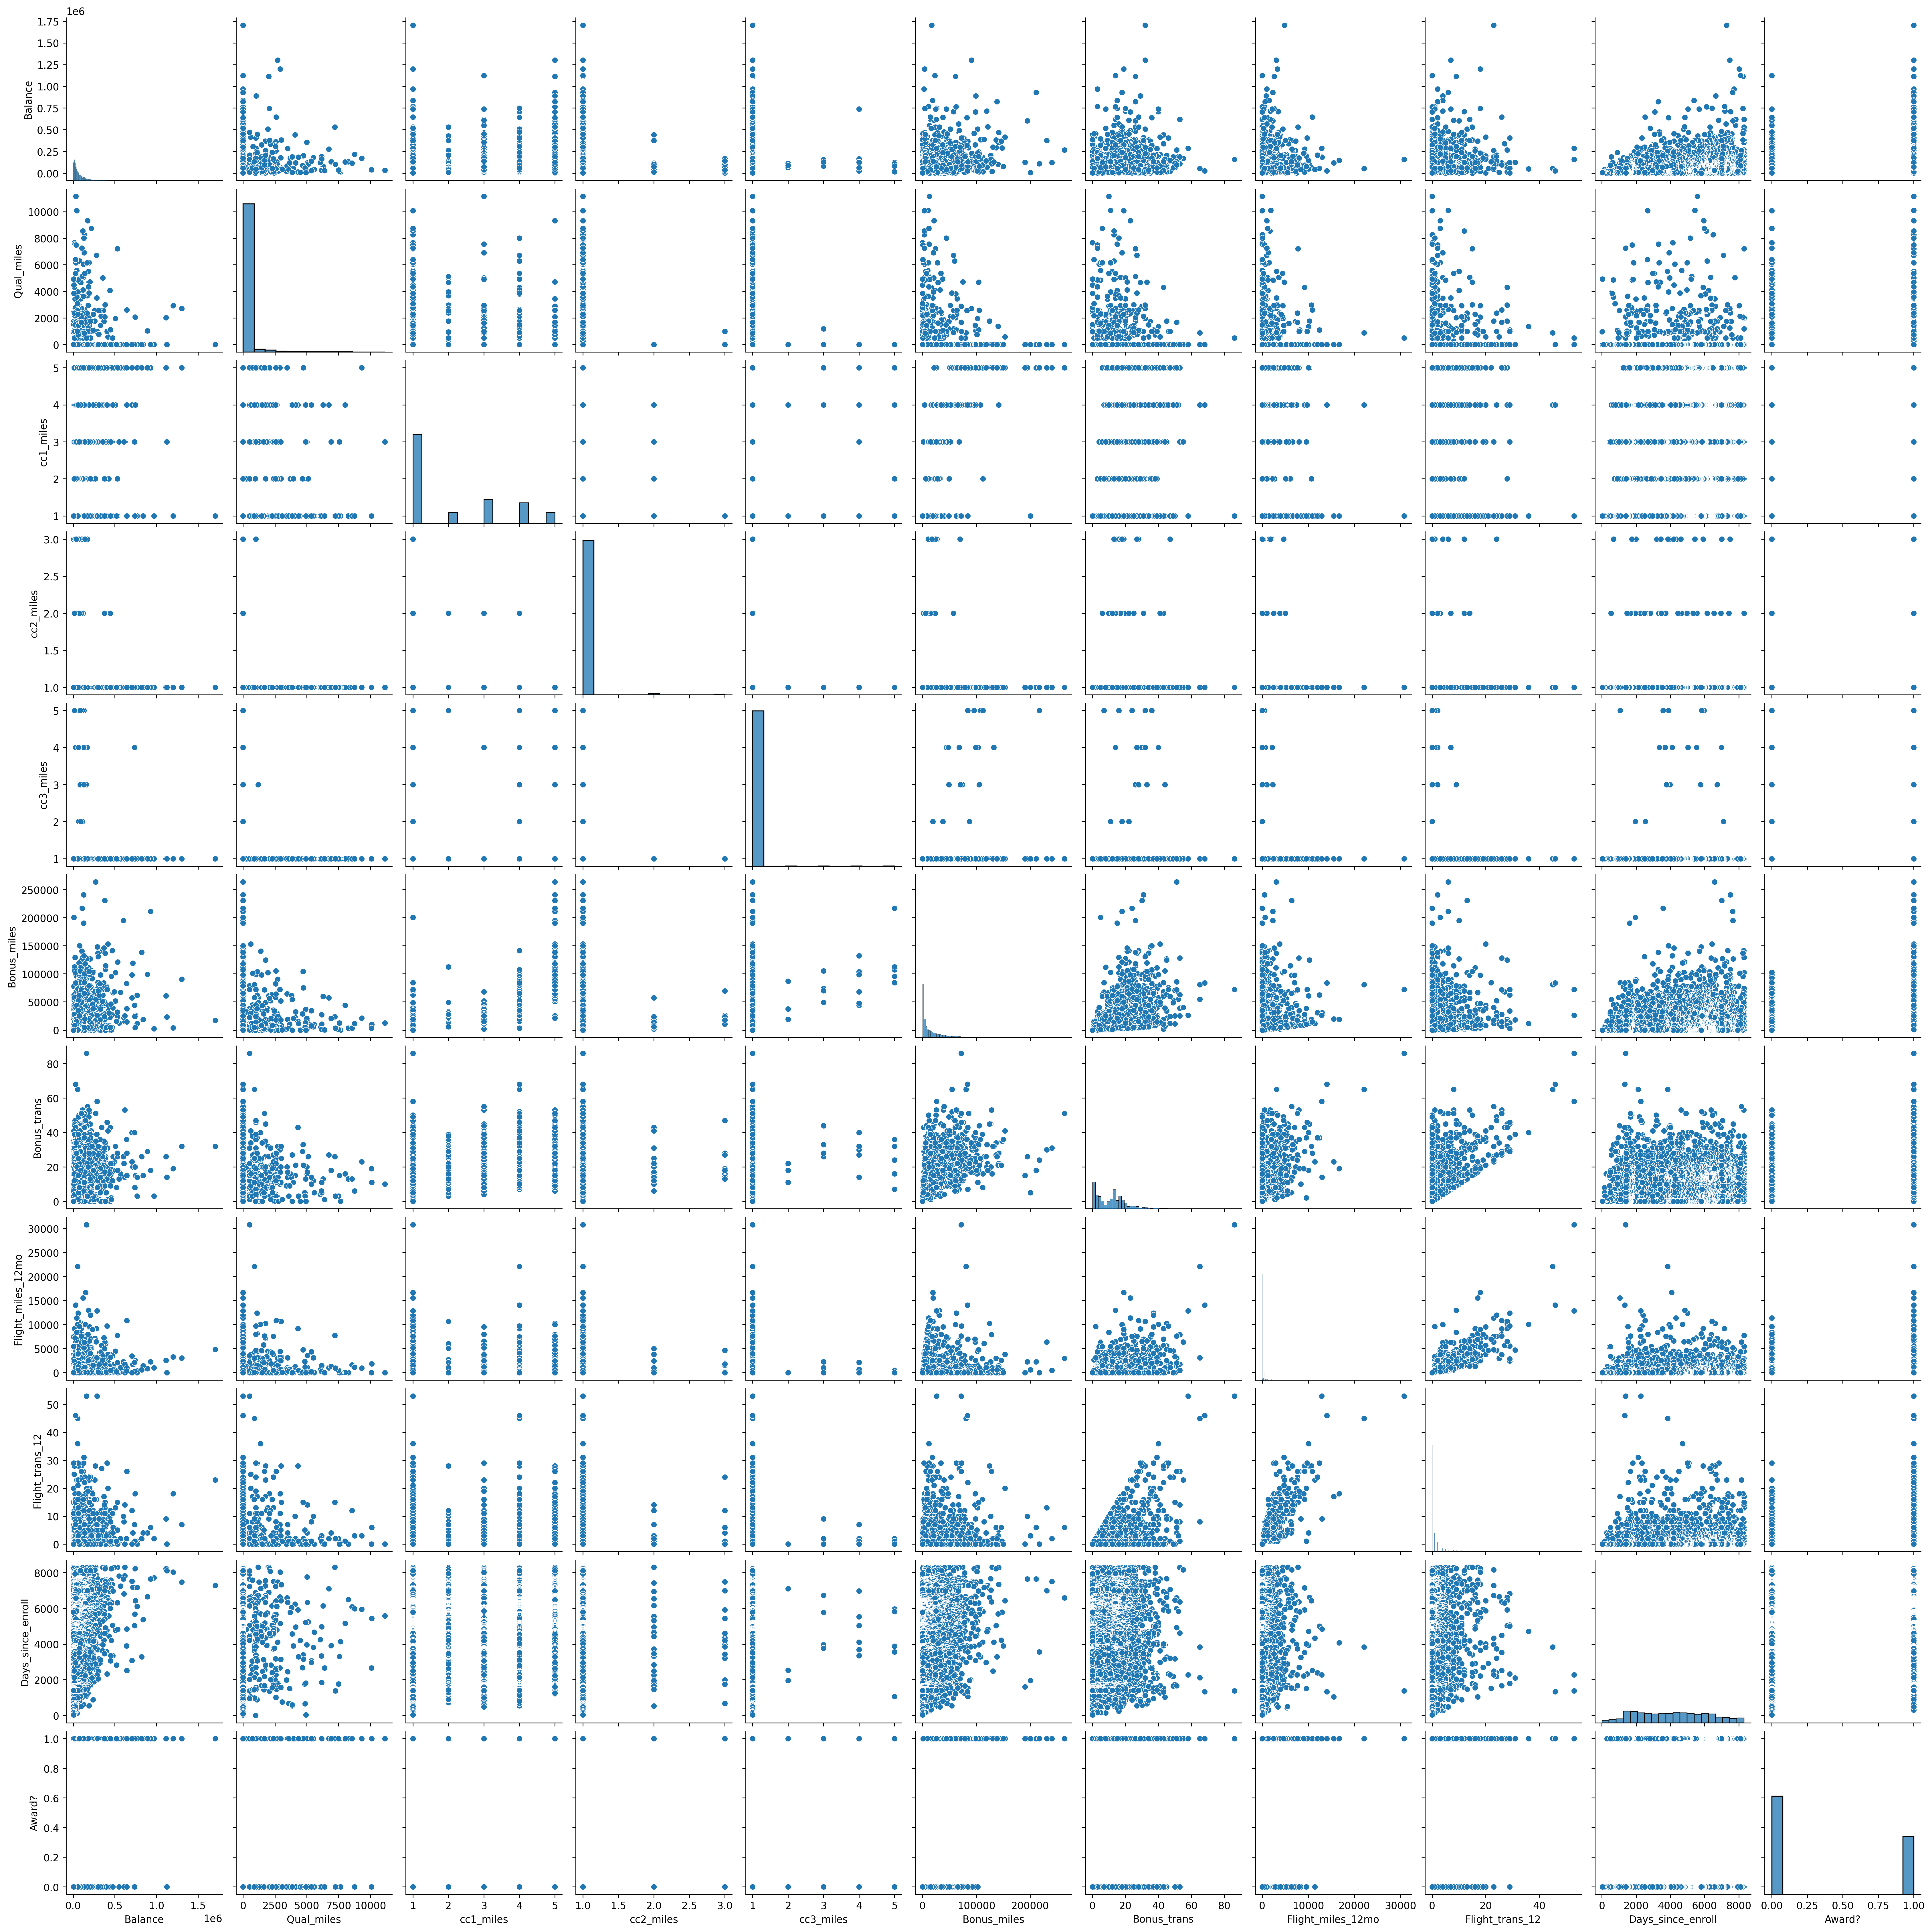

In [53]:
sns.pairplot(df)

In [54]:
from sklearn.cluster import DBSCAN
db = DBSCAN()

y3 =db.fit_predict(x)
y3

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [55]:
from sklearn.metrics import silhouette_score
silhouette_score(x, y3)

-0.07834757831741157

In [56]:
db = DBSCAN(eps = 7, min_samples=12)

y3 = db.fit_predict(x)
y3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
silhouette_score(x, y3)

0.8229455568687642

In [58]:
df['Y']= y3
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  Y  
0          0  0  
1          0  0  
2          0  0  
3          0  0  
4          1  0  
...      ... ..  
3994       1  0  
3995       1  0  
3996       1  0  
3997       0  0  
3998       0  0  

[3999 rows x 12 columns]

In [59]:
df[df['Y'] == -1]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
275   1704838           0          1          1          1        17108   
2015    53232         888          4          1          1        80696   
3583   160114         500          1          1          1        71954   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
275            32               4823               23               7283   
2015           65              22100               45               3831   
3583           86              30817               53               1373   

      Award?  Y  
275        1 -1  
2015       1 -1  
3583       1 -1